In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

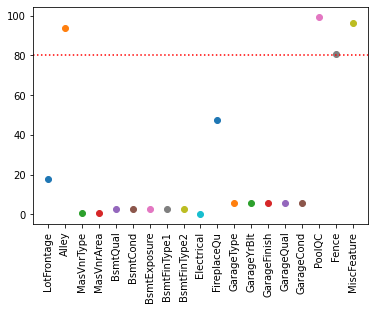

In [5]:
for col in df.columns:
    #print(col,'=',(df[col].isnull().sum()*100)/1460,'% num values')
    percent=(df[col].isnull().sum()*100)/1460
    if percent!=0:
        plt.scatter(col,percent)
plt.axhline(y = 80, color = 'r', linestyle = ':')
#plt.figure(figsize=(12,20))
plt.xticks(rotation=90)
plt.show()

In [6]:
for col in df.columns:
    if (df[col].isnull().sum()*100)/1460>= 80:
        df.drop([col],axis=1,inplace=True)

In [37]:
#df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [22]:
for col in df.columns:
    if df[col].dtypes=='object':
        if 'Year'in col:
            df.ffill(axis=0,inplace=True)
        elif 'BsmtFinType'in col:
            df.fillna('No Basement',inplace=True)
        elif 'GarageQual' or 'GarageCond'in col:
            df.fillna('No Garage',inplace=True)
        elif 'PoolQC'in col:
            df.fillna('No Pool',inplace=True)
        else:
            df.ffill(axis=0,inplace=True)

    else:
        df.fillna(value=df[col].mean(),inplace=True)

#df['MasVnrType'].mode()

In [40]:
#for col in df.columns:
#    if 'BsmtFinType'in col:
#        print(col)
#for col in df.columns:
print(df['YrSold'].isnull().sum())

0


In [8]:
df.skew(axis=0,skipna=True)

/tmp/ipykernel_76287/4266299306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0,skipna=True)


Id                0.000000
MSSubClass        1.407657
LotFrontage       1.662674
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.586135
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.842299
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

(array([1.438e+03, 1.300e+01, 6.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. , 101.6, 203.2, 304.8, 406.4, 508. ]),
 <BarContainer object of 5 artists>)

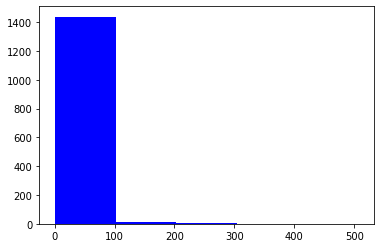

In [9]:
plt.hist(df['3SsnPorch'],bins=5,color='blue')

/tmp/ipykernel_76287/2823332499.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(figsize=(4,4))


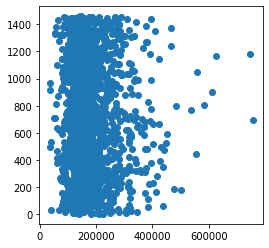

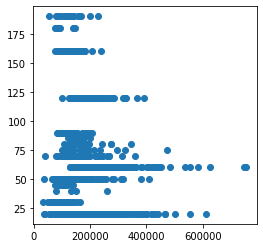

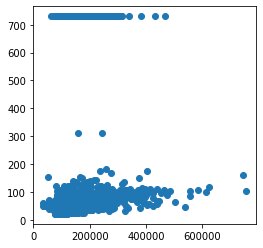

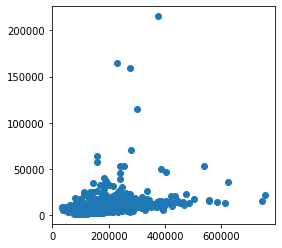

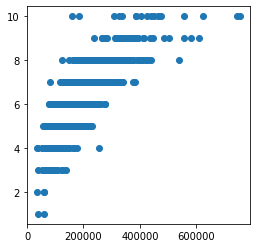

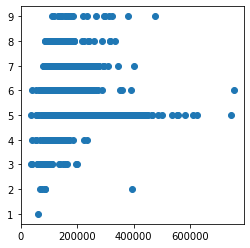

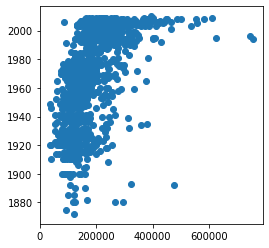

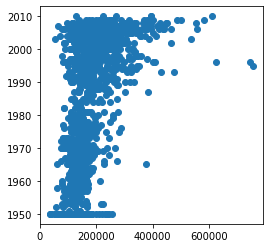

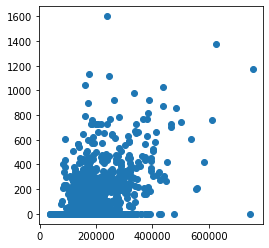

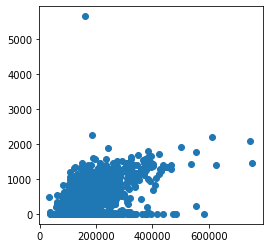

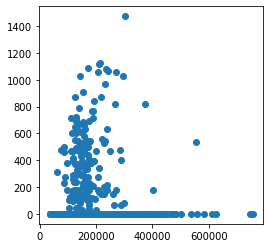

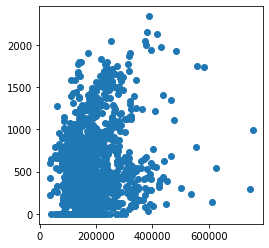

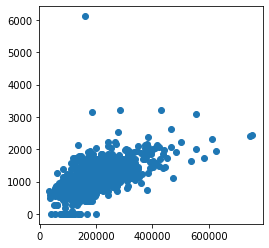

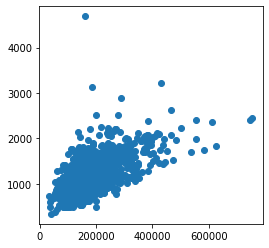

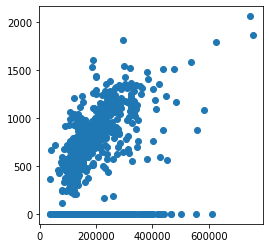

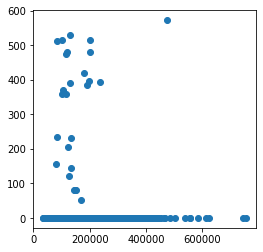

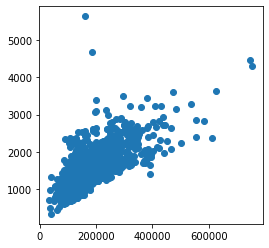

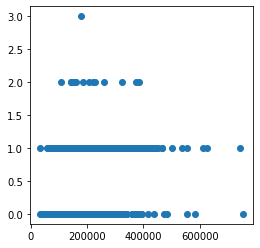

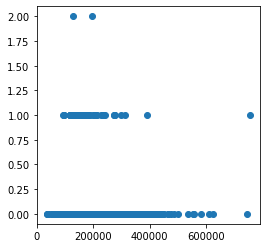

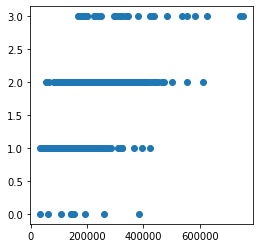

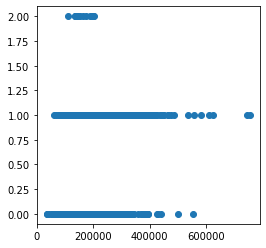

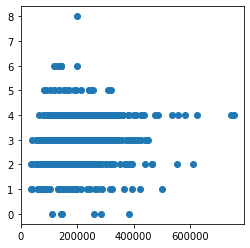

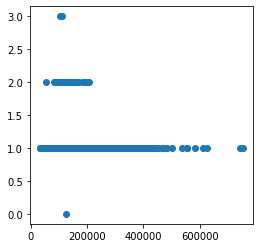

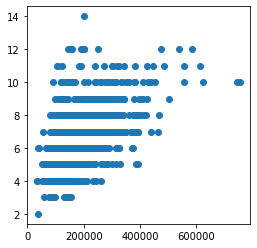

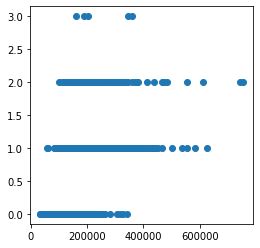

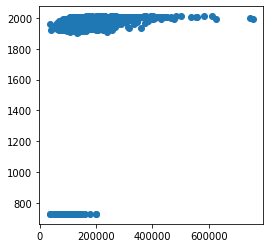

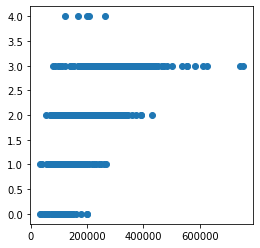

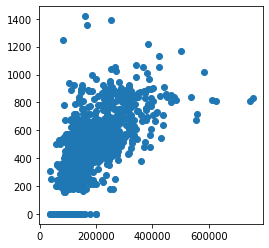

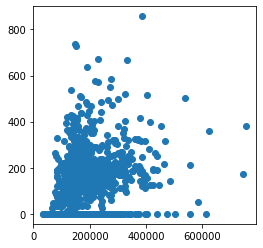

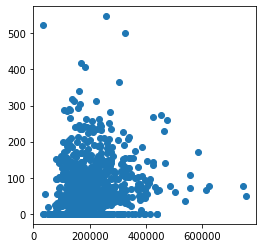

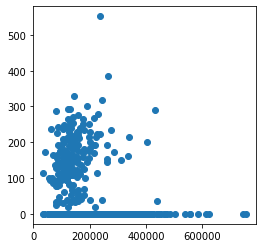

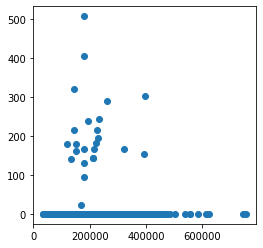

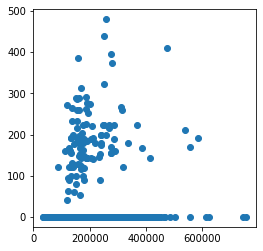

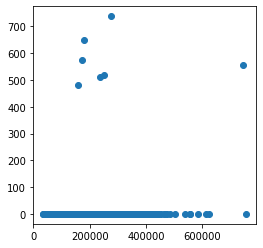

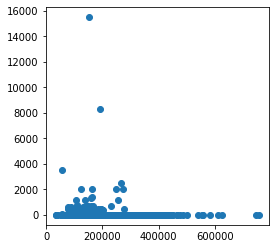

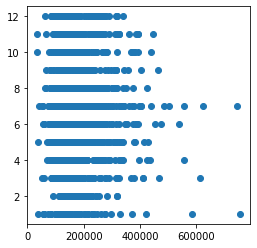

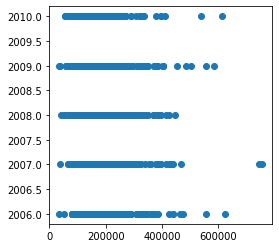

In [10]:
for col in df.columns:
    if df[col].dtypes!='object' and col!='SalePrice':
        fig,ax=plt.subplots(figsize=(4,4))
        ax.scatter(df['SalePrice'],df[col])
plt.show()        #print(col,df[col].value_counts()) 

In [11]:
df['GarageYrBlt']=df['GarageYrBlt']-1900

In [12]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','Id'],inplace=True,axis=1)

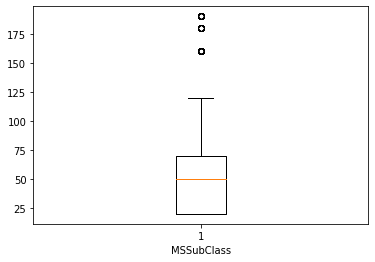

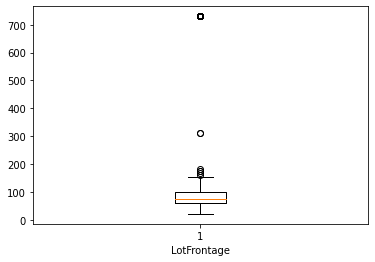

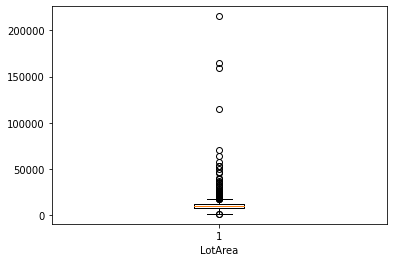

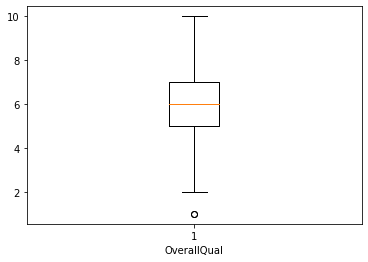

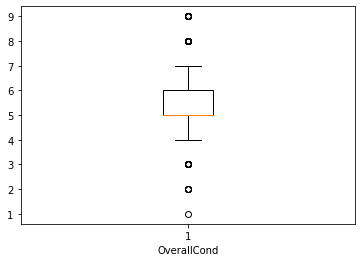

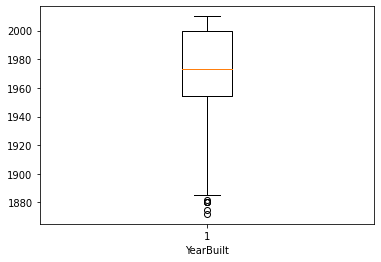

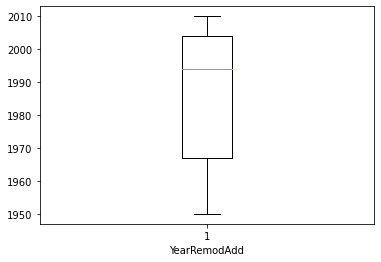

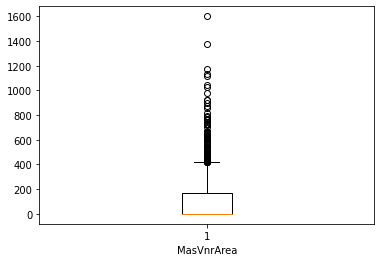

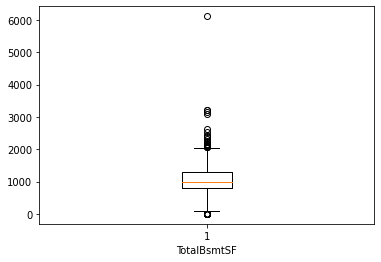

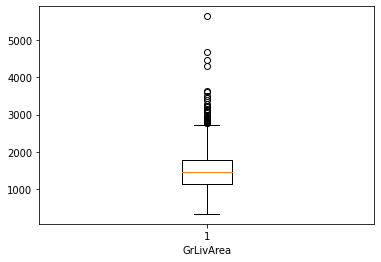

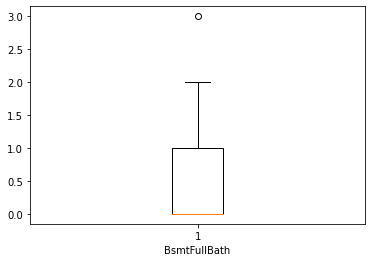

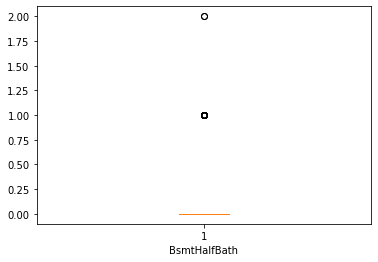

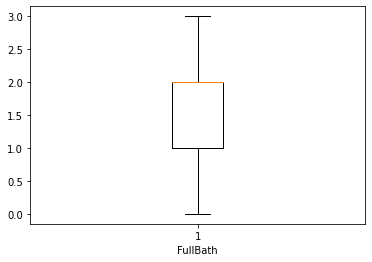

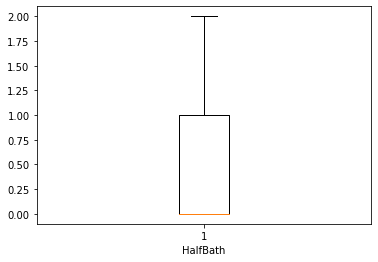

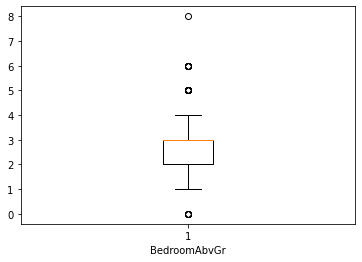

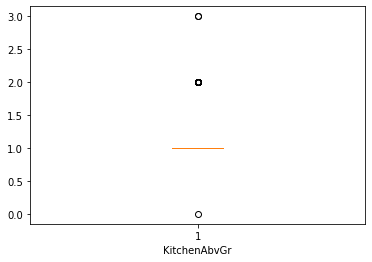

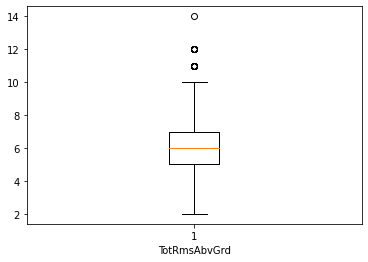

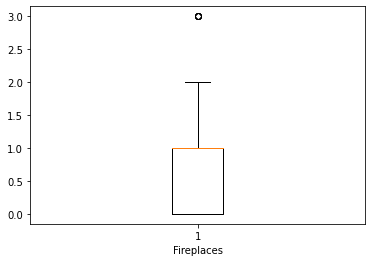

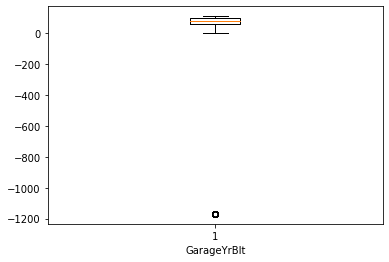

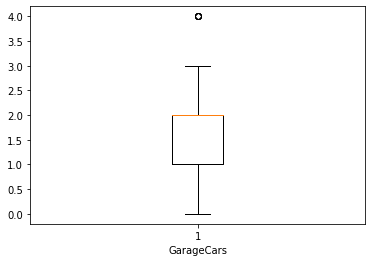

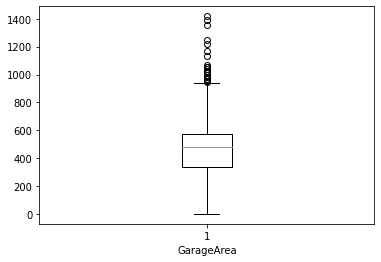

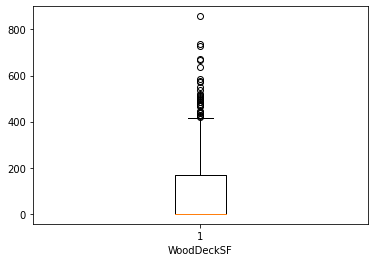

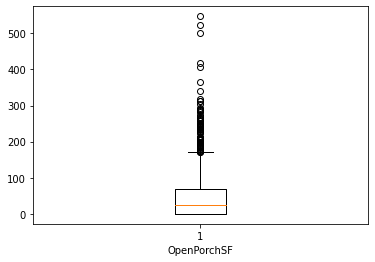

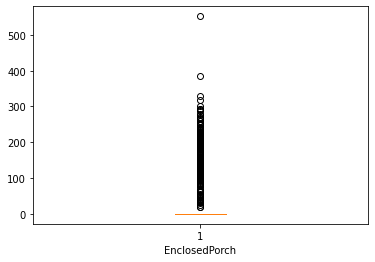

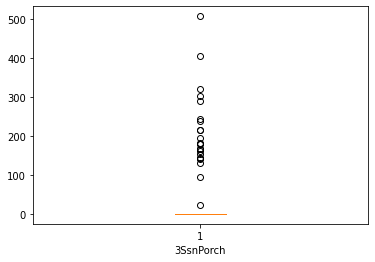

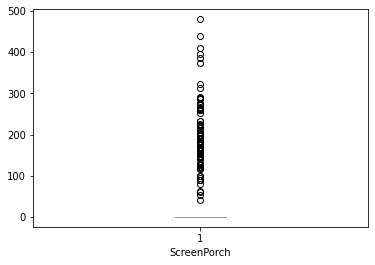

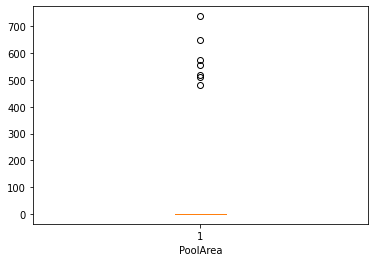

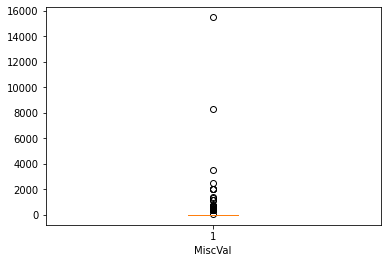

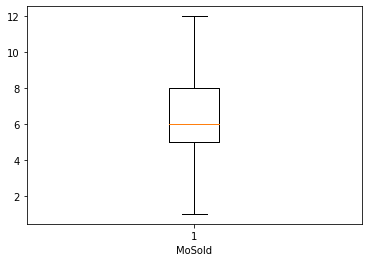

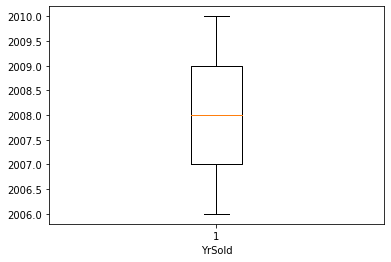

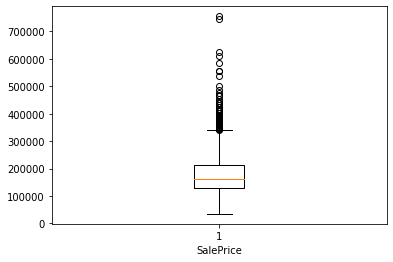

In [13]:
for col in df.columns:
    if df[col].dtypes!='object':
        plt.boxplot(df[col],vert=True)
        plt.xlabel(col)
        plt.show()  

In [14]:
df["Total Year"]=df['YrSold']-df['YearBuilt']

In [15]:
df.drop(['YrSold','YearBuilt'],inplace=True,axis=1)

<AxesSubplot:>

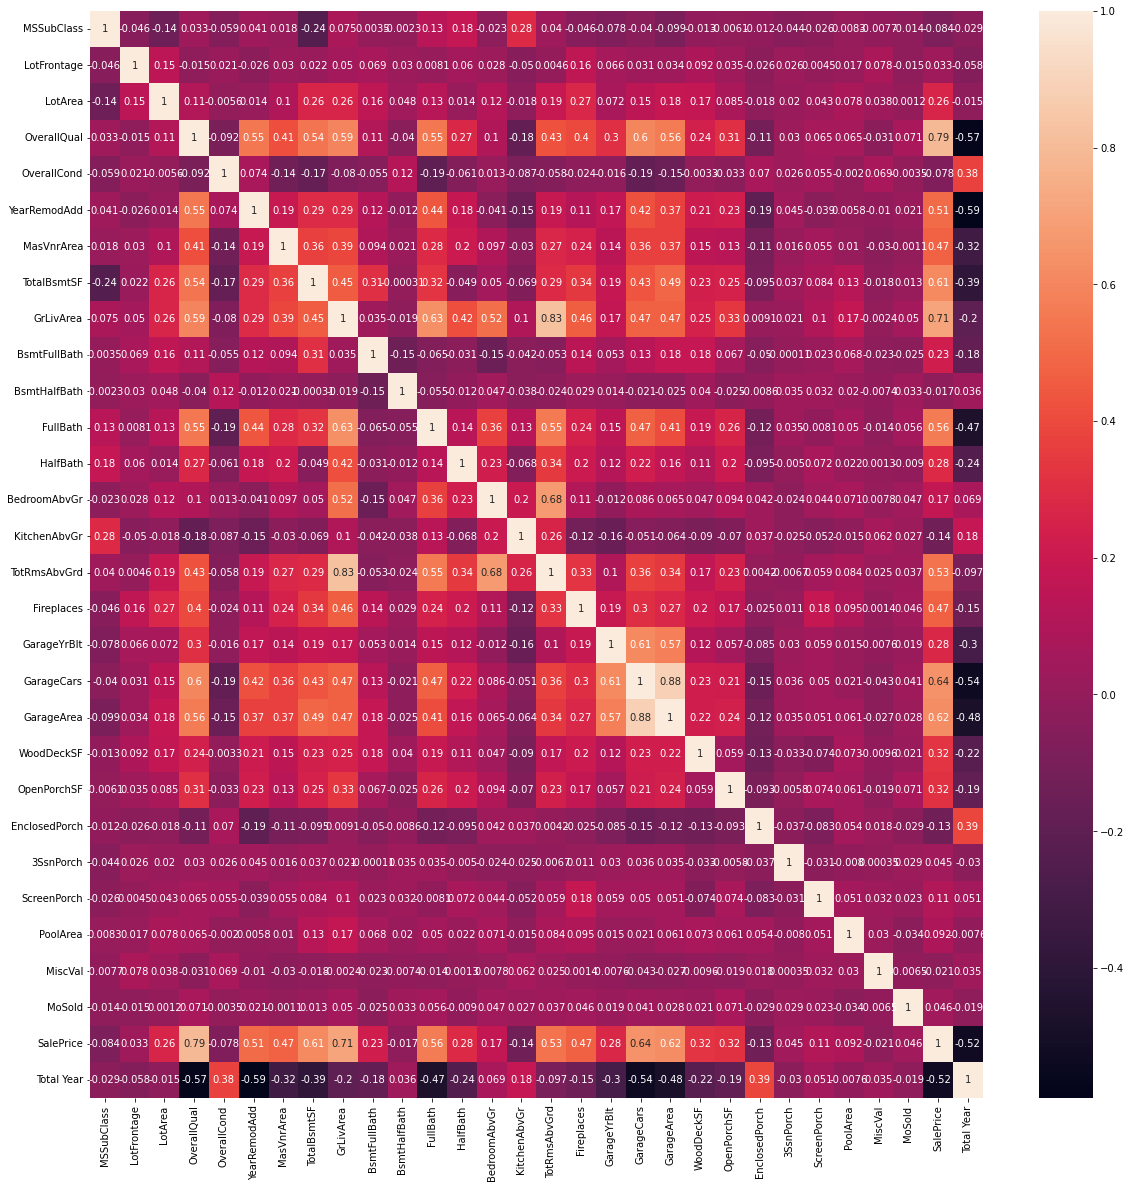

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [23]:
for col in df.columns:
    if df[col].dtypes=='object':
        map_data=df[col].unique()
        x={}
        count=0
        for i in range(len(map_data)):
            x[f"{map_data[i]}"]=count
            count+=1
        df[col]=df[col].map(x)

In [24]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [66]:
#print(len(x_train),len(y_train),len(x_test),len(y_test))

1168 1168 292 292


In [83]:
dtclf=DecisionTreeRegressor(max_depth=5,max_features= 'auto',max_leaf_nodes= None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter= 'best')
dtclf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

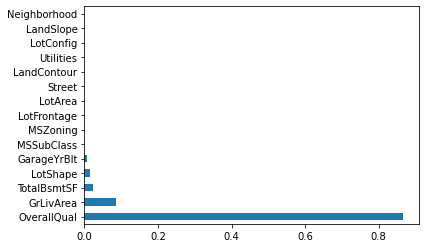

In [92]:
feat_importances = pd.Series(dtclf.feature_importances_, index=x.columns)

feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [93]:
print(feat_importances)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
SaleType         0.0
SaleCondition    0.0
Total Year       0.0
Length: 68, dtype: float64


In [91]:
y_pred=dtclf.predict(x_test)


In [88]:
dtclf.score(x_test,y_test)

0.5997198392399881

# Hyperparameter Tuning

In [114]:
parameters={"criterion":["best","random"],
            "n_estimators":[100,50,40,110,120,130],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_samples_split":[1,2,5,7,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90], 
           "n_jobs":[1,-1,-2,-3,-4]}

In [115]:
tuning_model=GridSearchCV(dtclf,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [116]:
tuning_model.fit(x,y)

Fitting 3 folds for each of 9072000 candidates, totalling 27216000 fits


ValueError: Invalid parameter n_estimators for estimator DecisionTreeRegressor(criterion='best', max_depth=1, max_features='auto',
                      min_samples_split=1, min_weight_fraction_leaf=0.1). Check the list of available parameters with `estimator.get_params().keys()`.

In [82]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [27]:
rfr=RandomForestRegressor(random_state=1)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [28]:
rfr.score(x_test,y_test)

0.8258574697731822

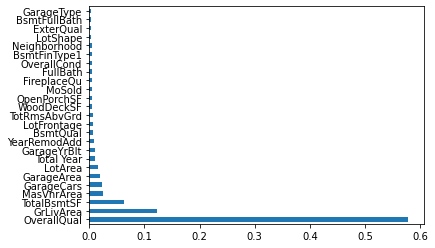

In [29]:
feat_importances = pd.Series(rfr.feature_importances_, index=x.columns)

feat_importances.nlargest(25).plot(kind='barh')
plt.show()

# Hyperparameter Tuning for Random Forest

In [30]:
parameters={"criterion":["squared_error","absolute_error","poisson"],
            "n_estimators":[100,50,120,130],# No of Trees in Randomforest
            "max_depth" : [3,5,7,9,11,12], # Depth of the Trees
           "min_samples_leaf":[5,6,7,8,9,10], # Samples in Trees leafs
            "min_samples_split":[5,10,15], # 
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,20,40,50,60], 
           }


In [31]:
tuning_model=GridSearchCV(rfr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(x,y)

Fitting 3 folds for each of 32400 candidates, totalling 97200 fits
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1405472894.023 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1653541276.579 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1636635465.432 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-1427911769.321 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-1676760611.662 tota

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1635982699.930 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1694729434.848 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1392530913.452 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1630734273.065 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1676338620.624 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3,

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1428430594.100 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1630359823.149 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1720791374.582 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=120;, score=-1390593476.199 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=120;, score=-1626726721.665 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=-1635407990.172 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1412376885.138 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1601551535.451 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1640834603.154 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50;, score=-1458574782.323 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dept

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1620733537.634 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1640185358.118 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1408398147.147 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1617810854.349 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1625047338.727 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1405830895.509 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1626580078.748 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1656038818.268 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-1365226552.322 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-1632042909.945 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=130;, score=-1611659404.923 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1345709473.715 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1622103536.754 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1626510392.685 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=50;, score=-1385273170.675 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=120;, score=-1624410582.382 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=120;, score=-1630385125.858 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1308474917.942 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1621821242.136 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1616360989.969 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-1631075511.563 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1329584216.943 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1604735631.912 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1659406097.904 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=120;, score=-1290432669.448 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_d

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1406930492.313 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1654901865.937 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1639986610.636 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1400233070.735 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1625872901.246 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=-1732645168.156 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1386621365.977 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1623406752.897 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1697006627.251 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=130;, score=-1386778593.312 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, 

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-1602094032.368 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-1645743617.069 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1445936045.961 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1597988547.440 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1672071391.698 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1399998444.314 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1620145626.292 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1627855553.335 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1409422734.133 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1609088710.905 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=50;, score=-1662464786.491 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1384648385.647 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1621332691.976 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1636527719.365 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=130;, score=-1385581468.703 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_dept

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-1622103536.754 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-1626510392.685 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1385273170.675 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1620364887.529 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1651144581.114 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, ma

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1308474917.942 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1621821242.136 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1616360989.969 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1303570140.162 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1617095805.067 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-1604735631.912 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-1659406097.904 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1290432669.448 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1620617447.375 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1631177328.560 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=-1646908581.555 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1418072757.356 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1650363524.056 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1637296019.225 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=50;, score=-1436449695.294 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dept

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-1631052107.032 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-1680029966.447 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-1398008166.040 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-1628958906.544 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-1662882830.756 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1448954806.875 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1597988547.440 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1674776829.827 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-1406810593.367 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-1614397559.383 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=5, n_estimators=130;, score=-1627855553.335 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1399235374.330 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1609695750.727 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1632756291.030 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=-1436289867.971 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-1622380427.380 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-1634443177.904 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1383653125.469 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1618176390.909 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1620490753.735 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1407036895.255 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1629089014.032 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1656038818.268 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1366208436.015 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1633230484.964 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=15, n_estimators=130;, score=-1611659404.923 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1303570140.162 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1617095805.067 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1627578695.970 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-1343887070.065 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=3,

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=5, n_estimators=120;, score=-1620617447.375 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=5, n_estimators=120;, score=-1631177328.560 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1292535657.544 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1624015179.765 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1618513318.195 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-1641974376.851 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-1424576317.525 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-1676760611.662 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-1688641006.149 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=-1403583149.069 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=-1630025110.847 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=-1670036417.180 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-1406044303.877 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-1621547795.479 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-1663629245.703 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1394489923.593 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1625889976.274 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1687049178.582 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=15, n_estimators=130;, score=-1394146199.107 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=15, n_estimators=130;, score=-1622504164.084 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-1632756291.030 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-1436289867.971 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-1616316494.239 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-1663210939.091 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=120;, score=-1399445893.374 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, ma

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1618176390.909 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1620490753.735 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=-1378808567.027 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=-1612223206.435 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=-1630624661.546 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1365226552.322 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1632042909.945 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1631570943.436 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1367273207.728 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1627465293.176 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-1626510392.685 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1385273170.675 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1620364887.529 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1651144581.114 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=15, n_estimators=120;, score=-1344142228.757 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=130;, score=-1621821242.136 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=130;, score=-1616360989.969 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1290883442.166 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1615057168.006 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1631075511.563 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-1693251652.773 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1399486526.232 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1661618407.078 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1661224406.747 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=-1396472800.718 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, 

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-1623846892.130 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-1668539947.863 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1425117908.519 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1648194449.565 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1710354943.123 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1390480676.125 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1622390866.651 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1668697756.490 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=15, n_estimators=100;, score=-1401353727.850 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=15, n_estimators=100;, score=-1618353146.076 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=50;, score=-1672071391.698 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=120;, score=-1410469644.851 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=120;, score=-1613359324.576 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=120;, score=-1650105702.581 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=130;, score=-1409504271.087 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_dept

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=5, n_estimators=100;, score=-1612223206.435 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=5, n_estimators=100;, score=-1630624661.546 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=-1417826221.572 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=-1623891531.028 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=-1662464786.491 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, ma

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=130;, score=-1367273207.728 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=130;, score=-1627465293.176 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=130;, score=-1614614040.097 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=-1364092989.786 total time=   0.4s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=-1624521563.532 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=50;, score=-1651144581.114 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=120;, score=-1344142228.757 total time=   0.5s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=120;, score=-1630863253.294 total time=   0.5s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=120;, score=-1628748134.540 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=130;, score=-1344350540.023 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_dept

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=15, n_estimators=100;, score=-1617095805.067 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=15, n_estimators=100;, score=-1627578695.970 total time=   0.4s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=15, n_estimators=50;, score=-1343887070.065 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=15, n_estimators=50;, score=-1615910876.777 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=15, n_estimators=50;, score=-1650362936.817 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=120;, score=-1631177328.560 total time=   0.5s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=130;, score=-1292535657.544 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=130;, score=-1624015179.765 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=130;, score=-1618513318.195 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1504163321.386 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-1841526380.461 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1491591861.736 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-2015987265.951 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1788283910.622 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1502108831.414 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, 

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=-1778242875.463 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1543814934.960 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-2041696922.800 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1832982476.925 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=10, n_estimators=120;, score=-1496175515.064 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=-2020009947.925 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=-1786267408.439 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1478615265.588 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-2020979911.493 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1772012313.838 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1484905858.283 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-2023479798.477 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1791555239.456 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1496623973.708 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-2022551825.416 total time=   0.4s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1542141774.786 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-2077269647.186 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1837995333.056 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-1494366443.375 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-2023750812.257 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=130;, score=-1783185815.262 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1473795357.766 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-2013454773.572 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1770523527.855 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=10, n_estimators=50;, score=-1520785065.984 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=120;, score=-2013098241.386 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=120;, score=-1793517902.362 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1489296918.461 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-2012921071.297 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1794366536.097 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1534772164.230 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-2070629240.558 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1851384203.679 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=120;, score=-1479332303.774 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=15, n_estimators=120;, score=-2017694421.209 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_d

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-2030994814.163 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1790604401.286 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1495299276.359 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-2011444748.235 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1774716013.399 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1492674143.568 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-2015817062.618 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1790569605.605 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=130;, score=-1503720605.718 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=130;, score=-2015349066.140 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-1772741332.921 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1531557339.324 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-2051426286.457 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1843579379.471 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=10, n_estimators=120;, score=-1481502099.623 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1789084326.631 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1477388045.575 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-2021075324.242 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1778366087.825 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=-1539347717.685 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_dept

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1797646175.856 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=130;, score=-1497362444.620 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=130;, score=-2021585290.753 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=130;, score=-1794282160.312 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=-1488023972.083 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dept

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=120;, score=-1480192613.306 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=120;, score=-2011269578.547 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=120;, score=-1786216646.207 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=130;, score=-1484672324.002 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=5, n_estimators=130;, score=-2010480843.789 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1778914592.978 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=50;, score=-1521351830.007 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=50;, score=-2066596852.983 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=50;, score=-1842594767.536 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=10, n_estimators=120;, score=-1485298603.177 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=130;, score=-1483837992.767 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=130;, score=-2017117970.132 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=130;, score=-1795444257.161 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-1476348954.966 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, n_estimators=100;, score=-2024138777.341 total time=   0.2s
[CV 3/3] END criterion=squared_error, ma

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=120;, score=-1493669094.155 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=120;, score=-2028288907.253 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=120;, score=-1784239204.497 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1505327927.791 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-2030994814.163 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=-1776017389.949 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=-1543376430.784 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=-2053987608.504 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=-1836772519.087 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1492674143.568 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, ma

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=-2028170808.488 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=-1786590740.797 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-1476716107.042 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-2016440221.963 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-1772741332.921 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=120;, score=-1484627891.970 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=120;, score=-2020337469.842 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=120;, score=-1791999330.396 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1497455460.028 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-2019732959.542 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=15, n_estimators=50;, score=-1543163491.573 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=15, n_estimators=50;, score=-2076234332.888 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=15, n_estimators=50;, score=-1849722198.626 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1486775370.219 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-2021877566.279 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=15, n_estimators=130;, score=-1784586221.604 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-1473795357.766 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-2013454773.572 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-1770523527.855 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1520785065.984 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=120;, score=-1793517902.362 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1489296918.461 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-2012921071.297 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1794366536.097 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1480173013.246 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-1534772164.230 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-2070629240.558 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-1851384203.679 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1479332303.774 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-2017694421.209 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_d

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=-2029481461.102 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=-1788517412.156 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1499064005.237 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-2024996936.409 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1774967555.790 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-1493426836.102 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-2011802411.355 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-1793522445.103 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-1504983339.576 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-2015717482.964 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1533497075.325 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-2061082359.202 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1850807850.116 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-1480403851.750 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-2029604896.513 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=130;, score=-1789084326.631 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1477647181.295 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-2016942392.566 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1778998931.976 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=-1542093780.646 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-1797644865.817 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1502815631.444 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-2022776195.398 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1794283759.861 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=15, n_estimators=100;, score=-1480189155.961 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1491580284.774 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-2023706529.723 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1787499890.426 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=15, n_estimators=130;, score=-1501969300.162 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=15, n_estimators=130;, score=-2023240481.827 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-1521351830.007 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-2066596852.983 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-1842594767.536 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=5, n_estimators=120;, score=-1485298603.177 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=5, n_estimators=120;, score=-2013098241.386 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1795444257.161 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-1476348954.966 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-2024138777.341 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-1778879825.824 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-1534772164.230 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=-2026640405.002 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=-1781868453.268 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=-1511031331.303 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=-2029481461.102 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=-1788517412.156 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=-1545042364.607 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=-2055945008.048 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=-1845614090.344 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-1493426836.102 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-2011802411.355 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=15, n_estimators=130;, score=-1793097957.257 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-1479030070.042 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-2027206178.984 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-1773217172.538 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1533497075.325 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=5, n_estimators=120;, score=-1791999330.396 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=5, n_estimators=130;, score=-1497455460.028 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=5, n_estimators=130;, score=-2019732959.542 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=5, n_estimators=130;, score=-1789084326.631 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1477647181.295 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-1491272002.653 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-2023086550.818 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-1797644865.817 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1502815631.444 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-2022776195.398 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1536673182.624 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-2077269647.186 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1837995333.056 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1491580284.774 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-2023706529.723 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=15, n_estimators=130;, score=-1783185815.262 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1480173013.246 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-2019784606.674 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1778914592.978 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-1521351830.007 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=5, n_estimators=120;, score=-1794575467.119 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1483837992.767 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-2017117970.132 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1795444257.161 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-1476348954.966 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_de

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-1414617099.244 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-2026642195.052 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-1768398441.676 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=-1388549831.072 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=-1946261985.672 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=-1745039252.828 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-1373243719.790 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-1891176216.157 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-1729852064.531 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50;, score=-1411165022.187 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_dept

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1894566286.698 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1728888054.367 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=15, n_estimators=130;, score=-1379585741.893 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=15, n_estimators=130;, score=-1908889125.324 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=15, n_estimators=130;, score=-1729165843.001 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-1771641007.532 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=120;, score=-1373473952.239 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=120;, score=-1894809208.935 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=120;, score=-1726497901.525 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=130;, score=-1381697183.596 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, 

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=-1890686306.624 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=-1716552282.701 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50;, score=-1405898301.730 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50;, score=-1953838661.619 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50;, score=-1778389109.428 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1386705878.198 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1926780667.133 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1720164748.728 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=15, n_estimators=100;, score=-1369442656.898 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_samples_split=15, n_estimators=100;, score=-1901148520.871 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=15, n_estimators=120;, score=-1375997964.014 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=15, n_estimators=120;, score=-1918951947.101 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=15, n_estimators=120;, score=-1730347558.732 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=15, n_estimators=130;, score=-1383858234.105 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=15, n_estimators=130;, score=-1931207417.000 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=-1396922641.677 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=-1979272621.070 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=-1797873459.852 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=120;, score=-1372682079.154 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=120;, score=-1934965638.078 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=-1957188663.832 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=-1750937809.052 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-1385554085.700 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-1936695658.663 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-1722237916.907 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=10, n_estimators=120;, score=-1385743578.461 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=10, n_estimators=120;, score=-1897441373.346 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=10, n_estimators=120;, score=-1745025050.872 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=-1392033096.587 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=-1909579693.854 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=15, n_estimators=50;, score=-1411151537.724 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=15, n_estimators=50;, score=-1955139852.810 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=15, n_estimators=50;, score=-1774102636.209 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1372146107.053 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=15, n_estimators=120;, score=-1894566286.698 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=15, n_estimators=130;, score=-1728593299.835 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-1368314155.176 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-1884138481.752 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-1715894235.259 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-1405536284.979 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=5, n_estimators=120;, score=-1724596934.880 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1384117923.708 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1916540724.381 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1724832055.042 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=10, n_estimators=100;, score=-1370342337.824 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1379589058.781 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1912560541.104 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1719501730.224 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1386705878.198 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=10, n_estimators=130;, score=-1926780667.133 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1409104276.028 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1974702241.868 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1785751403.978 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=15, n_estimators=120;, score=-1375997964.014 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_samples_split=15, n_estimators=120;, score=-1918951947.101 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=15, n_estimators=130;, score=-1734298458.195 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1363594630.588 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1917110671.506 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1729601920.540 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=-1396922641.677 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_dept

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1393569310.283 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1945040718.565 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1744680439.123 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=-1398563457.766 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=-1957188663.832 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3,

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1410196256.034 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1952989101.534 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1782153307.098 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=10, n_estimators=120;, score=-1385743578.461 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_samples_split=10, n_estimators=120;, score=-1897441373.346 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1727831662.550 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=15, n_estimators=100;, score=-1363860568.822 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=15, n_estimators=100;, score=-1883823269.392 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=15, n_estimators=100;, score=-1718903665.227 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_samples_split=15, n_estimators=50;, score=-1411151537.724 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_dept

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=15, n_estimators=120;, score=-1728909300.576 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=15, n_estimators=130;, score=-1381035527.365 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=15, n_estimators=130;, score=-1907143365.331 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=15, n_estimators=130;, score=-1728593299.835 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=-1368314155.176 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dept

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=5, n_estimators=120;, score=-1377212651.474 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=5, n_estimators=120;, score=-1903248577.191 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=5, n_estimators=120;, score=-1724596934.880 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1384117923.708 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_samples_split=5, n_estimators=130;, score=-1916540724.381 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3,

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=-1421338992.197 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=-1970633483.337 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=-1780378534.791 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1379589058.781 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_samples_split=10, n_estimators=120;, score=-1912560541.104 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=10, n_estimators=130;, score=-1728762898.223 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-1366746468.197 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-1911619832.780 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-1720613767.674 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_samples_split=15, n_estimators=50;, score=-1409104276.028 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_dept

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=15, n_estimators=120;, score=-1737018684.920 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=15, n_estimators=130;, score=-1384751456.206 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=15, n_estimators=130;, score=-1939560930.089 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_samples_split=15, n_estimators=130;, score=-1734298458.195 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=-1363594630.588 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-1415480405.930 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-2019380879.883 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-1768398441.676 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1393569310.283 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=-1945040718.565 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1745025156.046 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-1378506175.682 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-1887190091.394 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-1735103184.244 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-1410196256.034 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=10, n_estimators=120;, score=-1891326475.310 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=10, n_estimators=120;, score=-1727357028.655 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1384104492.748 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1909213864.216 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=-1727831662.550 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=15, n_estimators=50;, score=-1411750439.196 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=15, n_estimators=50;, score=-1949675039.931 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=15, n_estimators=50;, score=-1776085470.932 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=15, n_estimators=120;, score=-1373364340.458 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=15, n_estimators=120;, score=-1893122804.098 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1726763752.171 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, n_estimators=100;, score=-1370342337.824 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, n_estimators=100;, score=-1890686306.624 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, n_estimators=100;, score=-1716552282.701 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=-1405898301.730 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-1719501730.224 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=5, n_estimators=130;, score=-1386705878.198 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=5, n_estimators=130;, score=-1926780667.133 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=5, n_estimators=130;, score=-1720164748.728 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=-1372311658.579 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=10, n_estimators=120;, score=-1375997964.014 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=10, n_estimators=120;, score=-1918951947.101 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=10, n_estimators=120;, score=-1730347558.732 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=10, n_estimators=130;, score=-1383858234.105 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_samples_split=10, n_estimators=130;, score=-1931207417.000 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=50;, score=-1401205353.077 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=50;, score=-1975905309.975 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=50;, score=-1788712003.622 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=120;, score=-1379213213.763 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_samples_split=15, n_estimators=120;, score=-1928022162.292 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=15, n_estimators=130;, score=-1944026903.128 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=15, n_estimators=130;, score=-1739003818.591 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1392230650.951 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1935259513.070 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-1721410199.557 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dept

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1390920692.932 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1896305277.830 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=-1745021285.791 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1396220050.899 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=-1908637722.774 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3,

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=-1719029749.110 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1413024973.411 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1949159888.935 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=-1767016878.224 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_samples_split=10, n_estimators=120;, score=-1376657355.362 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=-1908551949.515 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=-1728535100.377 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1367810332.776 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1882093709.122 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_samples_split=15, n_estimators=100;, score=-1718578665.521 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1373438998.936 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1895530174.986 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=15, n_estimators=120;, score=-1727011951.061 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1381300469.147 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_samples_split=15, n_estimators=130;, score=-1909339313.636 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1421338992.197 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1970633483.337 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=50;, score=-1780378534.791 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-1379589058.781 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_samples_split=5, n_estimators=120;, score=-1912560541.104 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, ma

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=5, n_estimators=130;, score=-1728762898.223 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1366746468.197 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1911619832.780 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-1720613767.674 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_samples_split=10, n_estimators=50;, score=-1409104276.028 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth

[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=10, n_estimators=120;, score=-1737018684.920 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1384751456.206 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1939560930.089 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=10, n_estimators=130;, score=-1734298458.195 total time=   0.2s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_samples_split=15, n_estimators=100;, score=-1370110082.678 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1396922641.677 total time=   0.1s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1979272621.070 total time=   0.1s
[CV 3/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=-1797873459.852 total time=   0.1s
[CV 1/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=120;, score=-1372682079.154 total time=   0.2s
[CV 2/3] END criterion=squared_error, max_depth=3, max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=15, n_estimators=120;, score=-1934965638.078 total time=   0.2s
[CV 3/3] END criterion=squared_error, max_d

[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1510899626.008 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=15, n_estimators=130;, score=-1548428167.841 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1254179321.568 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1484253028.795 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-1621481622.905 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1240309465.096 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1476835690.053 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=-1603023713.553 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=5, n_estimators=130;, score=-1239432557.371 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=5, n_estimators=130;, score=-1473239381.429 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5,

[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-1546792636.684 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1239086824.984 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1461821365.543 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-1572886342.498 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=120;, score=-1216939968.742 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1490733972.967 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=130;, score=-1534614807.777 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1196960584.613 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1474055772.302 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100;, score=-1526700557.334 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_dep

[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1183460917.541 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1486893326.236 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15, n_estimators=120;, score=-1531297874.304 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15, n_estimators=130;, score=-1182198026.033 total time=   0.8s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15, n_estimators=130;, score=-1483282069.181 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_dep

[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-1510612363.487 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1174719804.014 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1481588474.085 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50;, score=-1534384194.411 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=5, n_estimators=120;, score=-1149740459.628 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, ma

[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1487684725.141 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=5, n_estimators=130;, score=-1498337330.223 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1112251234.828 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1481959270.181 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=-1507826010.265 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth

[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=-1525607289.048 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1093257651.340 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1487470744.091 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=120;, score=-1506706716.542 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=130;, score=-1093328941.409 total time=   0.7s
[CV 2/3] END criterion=squared_error, max

[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-976787784.144 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1282633753.821 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-1316865964.230 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=50;, score=-984372721.315 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=15, n_estimators=50;, score=-1300215068.657 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5

[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=15, n_estimators=120;, score=-1381467709.654 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-968158158.477 total time=   0.8s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-1266389981.510 total time=   0.8s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=15, n_estimators=130;, score=-1362399025.131 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=-989497576.601 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=

[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1251021143.221 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-1346562712.311 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-976308982.199 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-1261223020.554 total time=   0.8s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, n_estimators=120;, score=-1335417540.261 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=5, ma

[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-968309537.939 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1287087543.055 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-1322864194.455 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=-979780238.408 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=-1283393919.407 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5

[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=10, n_estimators=120;, score=-1321737334.999 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-960077167.424 total time=   0.8s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1291029906.356 total time=   0.8s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=10, n_estimators=130;, score=-1307897573.284 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_samples_split=15, n_estimators=100;, score=-967894255.855 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth

[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1293164399.861 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=15, n_estimators=50;, score=-1314163639.014 total time=   0.3s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-950435553.311 total time=   0.7s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1300162993.427 total time=   0.7s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=15, n_estimators=120;, score=-1313978795.248 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=

[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-903253072.816 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1305763321.001 total time=   0.6s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=-1299601621.665 total time=   0.6s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-935063747.281 total time=   0.3s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_samples_split=5, n_estimators=50;, score=-1295666155.239 total time=   0.3s
[CV 3/3] END criterion=squared_error, max_depth=5, max

[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=120;, score=-1300584526.311 total time=   0.7s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-885758553.650 total time=   0.8s
[CV 2/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1317033896.978 total time=   0.8s
[CV 3/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5, n_estimators=130;, score=-1289793080.585 total time=   0.8s
[CV 1/3] END criterion=squared_error, max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-890676496.622 total time=   0.6s
[CV 2/3] END criterion=squared_error, max_dept